## Building CNN model on `MNIST` dataset

In [506]:
import tensorflow as tf

### Loading data

In [507]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

(-0.5, 27.5, 27.5, -0.5)

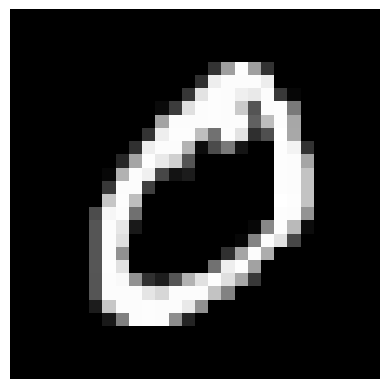

In [508]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap='gray')
plt.axis(False)

In [509]:
print(x_train.shape)
print(x_train[0].shape)
x_train.ndim

(60000, 28, 28)
(28, 28)


3

In [510]:
class_names = list(set(y_train))

### Ploting Random sample images

In [511]:
import random
def show_rand_img(file, label_file):
    index = random.randint(0, 6000)
    plt.imshow(file[index])
    plt.title(label_file[index])
    plt.axis(False)

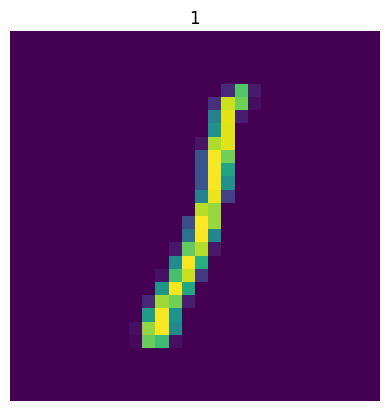

In [512]:
show_rand_img(x_train, y_train)

In [513]:
print(x_train.ndim)
x_train = tf.expand_dims(x_train, axis=-1)
x_train.shape

3


TensorShape([60000, 28, 28, 1])

In [514]:
x_test = tf.expand_dims(x_test, axis=-1)
x_test.shape

TensorShape([10000, 28, 28, 1])

### Building CNN model

In [515]:
from tensorflow.keras import layers
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    layers.Conv2D(filters=10, 
                  kernel_size=3,
                 activation='relu',
                 input_shape=(28, 28, 1)),
    # layers.MaxPool2D(pool_size=2),

    layers.Conv2D(10, 3, activation='relu'),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model.fit(x_train,
                   y_train,
                   epochs=5,
                   validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8766 - loss: 1.1349 - val_accuracy: 0.9640 - val_loss: 0.1230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0784 - val_accuracy: 0.9582 - val_loss: 0.1600
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9634 - val_loss: 0.1621
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0490 - val_accuracy: 0.9679 - val_loss: 0.1605
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0371 - val_accuracy: 0.9726 - val_loss: 0.1517


### Ploting the model performance over epochs

<Axes: >

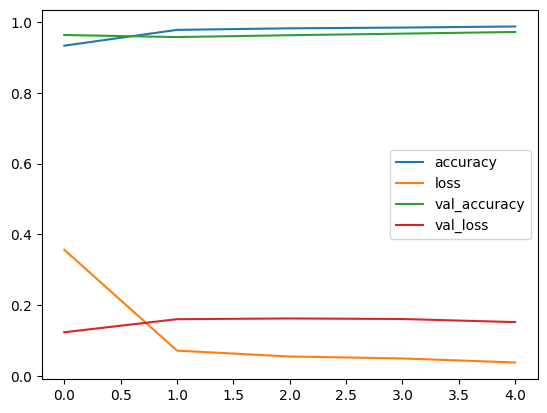

In [516]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [517]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)                   │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 24, 24, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 5760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │          57,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,862 (686.96 KB)

 Trainable params: 58,620 (228.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,242 (457.98 KB)

In [519]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1920


[0.15172728896141052, 0.972599983215332]

### Predicting the images in the testset

In [520]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [521]:
predicted = [tf.argmax(item).numpy() for item in pred]

### Generating random `Images` in x_test dataset with `Predited` labels

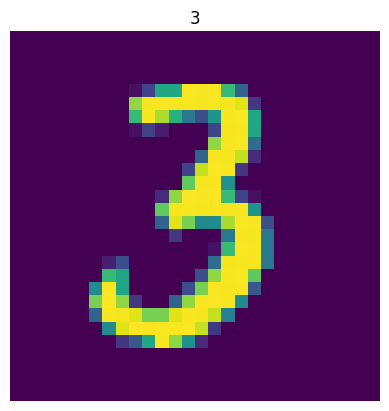

In [585]:
show_rand_img(file = x_test, 
              label_file = predicted)